## **Problem Statement - Finding Desired Feed from Social Platform Eg - Twitter**

## ThirdAI's NeuralDB

NeuralDB, as the name suggests, is a combination of a neural network and a database. It provides a high-level API for users to insert different types of files into it and search through the file contents with natural language queries. The neural network part of it enables semantic search while the database part of it stores the paragraphs of the files that are inserted into it.

First, let's install the dependencies.

In [ ]:
!pip3 install thirdai --upgrade
!pip3 install thirdai[neural_db]
!pip3 install langchain --upgrade
!pip3 install openai --upgrade
!pip3 install paper-qa --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.8/837.8 kB 43.1 MB/s eta 0:00:0

In [ ]:
from thirdai import licensing, neural_db as ndb
licensing.activate("1FB7DD-CAC3EC-832A67-84208D-C4E39E-V3")

Now, let's import the relevant module and define a neural db class.

In [ ]:
db = ndb.NeuralDB(user_id="my_user") # you can use any username, in the future, this username will let you push models to the model hub

We have a model bazaar that provides users with domain specific NeuralDBs that can jumpstart searching on their private documents. The Bazaar has two main types of DBs

1. Base DBs: These come with models that have either general QnA capabilities or domain specific capabilities like search on Medical Documents, Financial documents or Contracts. These come with an empty data index into which users can insert their files.

2. Pre-Indexed DBs: These are ready-to-search DBs that come with pre-trained models and their corresponding datasets. These are meant to  search through large public datasets like PubMed or Amazon 3MM Products or Stackoverflow issues etc.

In [ ]:
# Set up a cache directory
import os
if not os.path.isdir("bazaar_cache"):
    os.mkdir("bazaar_cache")

from pathlib import Path
from thirdai.neural_db import Bazaar
bazaar = Bazaar(cache_dir=Path("bazaar_cache"))


Call fetch to refresh list of available DBs.

In [ ]:
bazaar.fetch() # Optional arg filter="model name" to filter by model name.


Below is the list of all DBs in the Bazaar.

In [ ]:
print(bazaar.list_model_names())


['Contract Review', 'Finance QnA', 'General QnA']


Finally load the DB

In [ ]:
db = bazaar.get_model("General QnA")

### Inserting our files

Let's insert things into it!

#### Example 1: CSV files
The first example below shows how to insert a CSV file. Please note that a CSV file is required to have a column named "DOC_ID" with rows numbered from 0 to n_rows-1.

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('training data2.csv', index_col = 0)

### Taking a deep copy of the data so as to not modify the original data

In [ ]:
data1 = data.copy(deep = True)
data2 = data.copy(deep = True)

### Displaying the first 5 rows of the dataframe

In [ ]:
data1.head()

,uid,user_name,date_tweeted,text
No,,,,
1,6845,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ..."
2,4563,Joe Biden,16-6-24,I want to apologize to that girl that stole my...
3,4804,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot
4,6589,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...
5,3124,ADANI,21-6-21,omg just noticed my prozac prescription has ex...


### Display the last 5 rows of the dataframe

In [ ]:
data1.tail()

,uid,user_name,date_tweeted,text
No,,,,
15,4561,TENDULKAR,24-6-31,"What are your thoughts on 2020?\n\nEvery year,..."
16,1645,RAHUL,24-6-32,I think it's dumb to ask specific questions li...
17,9746,SEHWAG,24-6-33,i think what we're building is like the netfli...
18,1346,AKSHAY KUMMAR,24-6-34,All my billions are belong to you
19,7913,AMIR KHAN,24-6-35,Building Beautiful things is a Passion not a C...


### Display all the columns of the dataframe

In [ ]:
data1.columns

Index(['uid', 'user_name', 'date_tweeted', 'text'], dtype='object')

### Display the selected column only

In [ ]:
data1['user_name']#.head()

No
1     Narendra Modi
2         Joe Biden
3        Justin Saj
4             DHIRU
5             ADANI
6        RATAN TATA
7          SAANDEEP
8             VIJAY
9             QATAR
10         EMIRATES
11        AIR INDIA
12            LEONO
13          RONALDO
14           SACHIN
15        TENDULKAR
16            RAHUL
17           SEHWAG
18    AKSHAY KUMMAR
19        AMIR KHAN
Name: user_name, dtype: object

In [ ]:
data1['user_name']

No
1     Narendra Modi
2         Joe Biden
3        Justin Saj
4             DHIRU
5             ADANI
6        RATAN TATA
7          SAANDEEP
8             VIJAY
9             QATAR
10         EMIRATES
11        AIR INDIA
12            LEONO
13          RONALDO
14           SACHIN
15        TENDULKAR
16            RAHUL
17           SEHWAG
18    AKSHAY KUMMAR
19        AMIR KHAN
Name: user_name, dtype: object

In [ ]:
data1.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64', name='No')

In [ ]:
data1.reset_index()

,No,uid,user_name,date_tweeted,text
0,1,6845,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ..."
1,2,4563,Joe Biden,16-6-24,I want to apologize to that girl that stole my...
2,3,4804,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot
3,4,6589,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...
4,5,3124,ADANI,21-6-21,omg just noticed my prozac prescription has ex...
5,6,6312,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK
6,7,7894,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...
7,8,8563,VIJAY,24-6-24,Kanye said slavery was a choice
8,9,4521,QATAR,24-6-25,Hey Guys!\nWatch me play minecraft \n(all my m...
9,10,6734,EMIRATES,24-6-26,Just finished reading a biography of Henry Dav...


### Creating a new column where the uid less then 5000 will be considered verified

In [ ]:
data1['uid']

No
1     6845
2     4563
3     4804
4     6589
5     3124
6     6312
7     7894
8     8563
9     4521
10    6734
11    1214
12    1254
13    7896
14    4561
15    4561
16    1645
17    9746
18    1346
19    7913
Name: uid, dtype: int64

In [ ]:
data1['verified'] = (data1['uid'] < 5000)

### Now the the column added with tag 'verified'

In [ ]:
data1

,uid,user_name,date_tweeted,text,verified
No,,,,,
1,6845,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ...",False
2,4563,Joe Biden,16-6-24,I want to apologize to that girl that stole my...,True
3,4804,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot,True
4,6589,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...,False
5,3124,ADANI,21-6-21,omg just noticed my prozac prescription has ex...,True
6,6312,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK,False
7,7894,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...,False
8,8563,VIJAY,24-6-24,Kanye said slavery was a choice,False
9,4521,QATAR,24-6-25,Hey Guys!\nWatch me play minecraft \n(all my m...,True


In [ ]:
data1['verified']

No
1     False
2      True
3      True
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11     True
12     True
13    False
14     True
15     True
16     True
17    False
18     True
19    False
Name: verified, dtype: bool

Selecting particular rows using "loc" function

In [ ]:
data1.loc[3]

uid                                                  4804
user_name                                      Justin Saj
date_tweeted                                      30-7-20
text            i may be an 8 but im a 8 thats pretty hot
verified                                             True
Name: 3, dtype: object

Selecting row with Id "3" and column name "LotArea" and "Street"

In [ ]:
data1.loc[3, ['user_name', 'text']]

user_name                                   Justin Saj
text         i may be an 8 but im a 8 thats pretty hot
Name: 3, dtype: object

*People who are not verified*

In [ ]:
data1[data1['uid'] >= 5000]

,uid,user_name,date_tweeted,text,verified
No,,,,,
1,6845,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ...",False
4,6589,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...,False
6,6312,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK,False
7,7894,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...,False
8,8563,VIJAY,24-6-24,Kanye said slavery was a choice,False
10,6734,EMIRATES,24-6-26,Just finished reading a biography of Henry Dav...,False
13,7896,RONALDO,24-6-29,Kanye said slavery was a choice,False
17,9746,SEHWAG,24-6-33,i think what we're building is like the netfli...,False
19,7913,AMIR KHAN,24-6-35,Building Beautiful things is a Passion not a C...,False


### Get statistics of the dataframe i.e. mean, median, mode, correlation, variance, standard deviation and more

In [ ]:
data1.mean(numeric_only = True)

uid         5267.631579
verified       0.526316
dtype: float64

In [ ]:
data1.median(numeric_only =True)

uid         4804.0
verified       1.0
dtype: float64

In [ ]:
data1.mode()

,uid,user_name,date_tweeted,text,verified
0,4561.0,ADANI,15-5-23,Kanye said slavery was a choice,True
1,NaN,AIR INDIA,16-6-24,omg ive been saying chelsea should sign zidane...,NaN
2,NaN,AKSHAY KUMMAR,21-6-21,NaN,NaN
3,NaN,AMIR KHAN,24-6-22,NaN,NaN
4,NaN,DHIRU,24-6-23,NaN,NaN
5,NaN,EMIRATES,24-6-24,NaN,NaN
6,NaN,Joe Biden,24-6-25,NaN,NaN
7,NaN,Justin Saj,24-6-26,NaN,NaN
8,NaN,LEONO,24-6-27,NaN,NaN
9,NaN,Narendra Modi,24-6-28,NaN,NaN


In [ ]:
data1.std(numeric_only = True)

uid         2657.284981
verified       0.512989
dtype: float64

In [ ]:
data1.var(numeric_only = True)

uid         7.061163e+06
verified    2.631579e-01
dtype: float64

In [ ]:
data1.skew(numeric_only = True)

uid        -0.197316
verified   -0.114668
dtype: float64

In [ ]:
data1.dtypes

uid              int64
user_name       object
date_tweeted    object
text            object
verified          bool
dtype: object

In [ ]:
data1.corr(numeric_only = True)

,uid,verified
uid,1.000000,-0.859251
verified,-0.859251,1.000000


In [ ]:
data1.describe()

,uid
count,19.000000
mean,5267.631579
std,2657.284981
min,1214.000000
25%,3822.500000
50%,4804.000000
75%,7369.500000
max,9746.000000


In [ ]:
data1.isnull().sum()#to_dict()

uid             0
user_name       0
date_tweeted    0
text            0
verified        0
dtype: int64

In [ ]:
data1.isnull().sum().to_dict()

{'uid': 0, 'user_name': 0, 'date_tweeted': 0, 'text': 0, 'verified': 0}

In [ ]:
data1.isnull().sum().sum()

0

# Separating dataframe into numerical and categorical columns for Visualization

In [ ]:
num = data1.select_dtypes(include = 'number')
cat = data1.select_dtypes(include = 'object')

In [ ]:
num

,uid
No,
1,6845
2,4563
3,4804
4,6589
5,3124
6,6312
7,7894
8,8563
9,4521


In [ ]:
num2 = num


In [ ]:
num2.drop("Unnamed: 5",axis=1, inplace = True)

KeyError: ignored

In [ ]:
num2.drop("Unnamed: 6",axis=1, inplace = True)

In [ ]:
num2.drop("Unnamed: 7",axis=1, inplace = True)

In [ ]:
num2.dropna(axis=0, inplace = True)

In [ ]:
num2

,uid
No,
1,6845
2,4563
3,4804
4,6589
5,3124
6,6312
7,7894
8,8563
9,4521


In [ ]:
cat

,user_name,date_tweeted,text
No,,,
1,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ..."
2,Joe Biden,16-6-24,I want to apologize to that girl that stole my...
3,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot
4,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...
5,ADANI,21-6-21,omg just noticed my prozac prescription has ex...
6,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK
7,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...
8,VIJAY,24-6-24,Kanye said slavery was a choice
9,QATAR,24-6-25,Hey Guys!\nWatch me play minecraft \n(all my m...


In [ ]:
cat2 = cat
cat2.dropna()

,user_name,date_tweeted,text
No,,,
1,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ..."
2,Joe Biden,16-6-24,I want to apologize to that girl that stole my...
3,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot
4,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...
5,ADANI,21-6-21,omg just noticed my prozac prescription has ex...
6,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK
7,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...
8,VIJAY,24-6-24,Kanye said slavery was a choice
9,QATAR,24-6-25,Hey Guys!\nWatch me play minecraft \n(all my m...


find out the outliers of numerical features using Boxplot. We can see that most of the numerical features contain outliers and hence their distribution should to be skewed.

Boxplot also helps us in understanding the distribution of the features along with uncovering statistical measures. For example the lowermost line is the minimum percentile, the baseline of the box is 25th percentile, the middle line is the 50 percentile(or median), the uppermost line of the box is 75th percentile and the topmost line is the maximum percentile.

<Axes: >

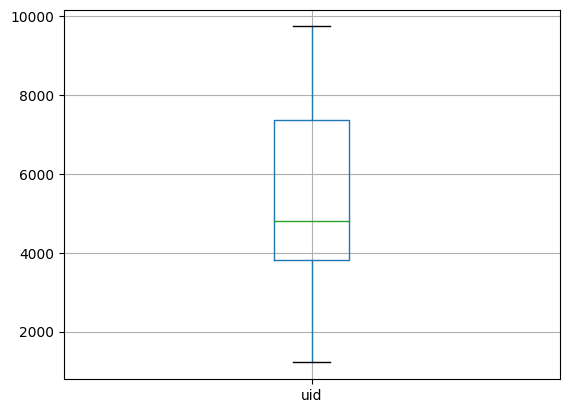

In [ ]:
num2.boxplot(column = 'uid')

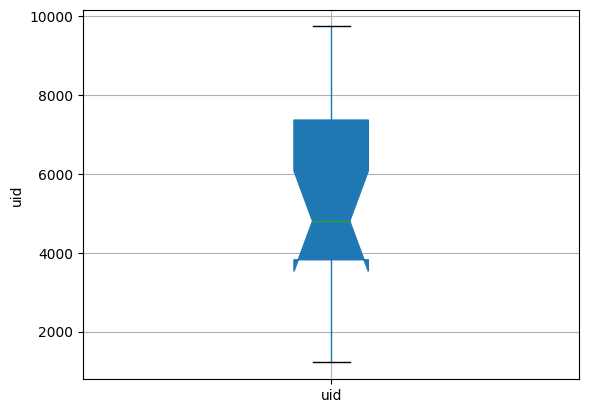

In [ ]:
for i in num2:
    num.boxplot(column = i, patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

In [ ]:
data1

,uid,user_name,date_tweeted,text,verified
No,,,,,
1,6845,Narendra Modi,15-5-23,"okay, so this video is gonna be about george, ...",False
2,4563,Joe Biden,16-6-24,I want to apologize to that girl that stole my...,True
3,4804,Justin Saj,30-7-20,i may be an 8 but im a 8 thats pretty hot,True
4,6589,DHIRU,25-5-20,I LITERALLY JUST FELL OUT OF MY BED AND STRAIG...,False
5,3124,ADANI,21-6-21,omg just noticed my prozac prescription has ex...,True
6,6312,RATAN TATA,24-6-22,MUTUAL I'M ALL TALK AND NO WALK,False
7,7894,SAANDEEP,24-6-23,omg ive been saying chelsea should sign zidane...,False
8,8563,VIJAY,24-6-24,Kanye said slavery was a choice,False
9,4521,QATAR,24-6-25,Hey Guys!\nWatch me play minecraft \n(all my m...,True


In [ ]:
data1.shape

(19, 5)

**Check the distribution of numerical features using distplot. This helps in checking the skewness of numerical features. As seen above in the boxplots, most of the numerical features have outliers and hence the distribution is skewed thus validating our previous insight.**

<Axes: xlabel='uid', ylabel='Density'>

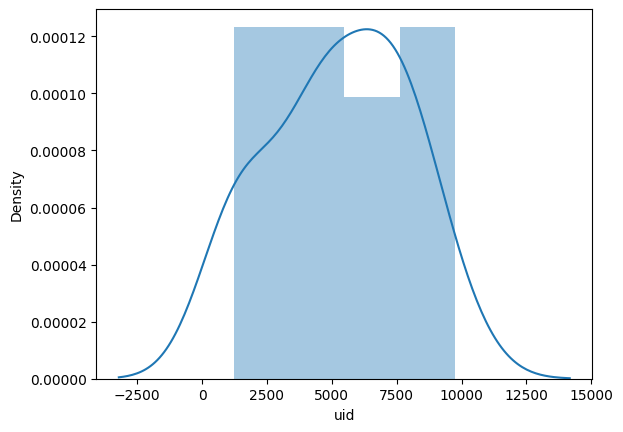

In [ ]:
sns.distplot(data['uid'])

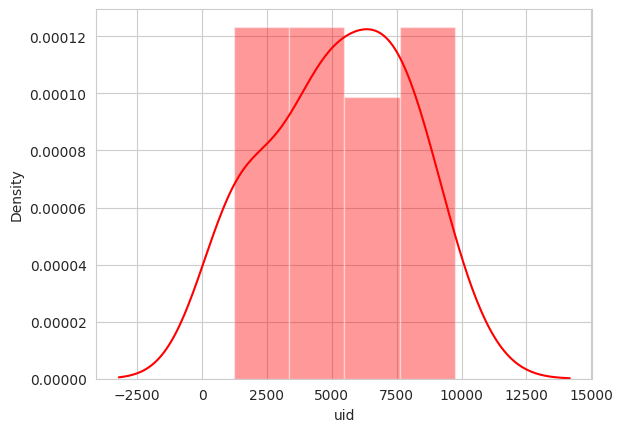

In [ ]:
sns.set_style('whitegrid')
for j in num:
    sns.distplot(data1[j], kde = True, color = 'red')
    plt.show()

**Scatter plot to check the correlation of input feature to the target feature. This also helps in uncovering useful and actionable insights from the data.**

<Axes: xlabel='uid', ylabel='date_tweeted'>

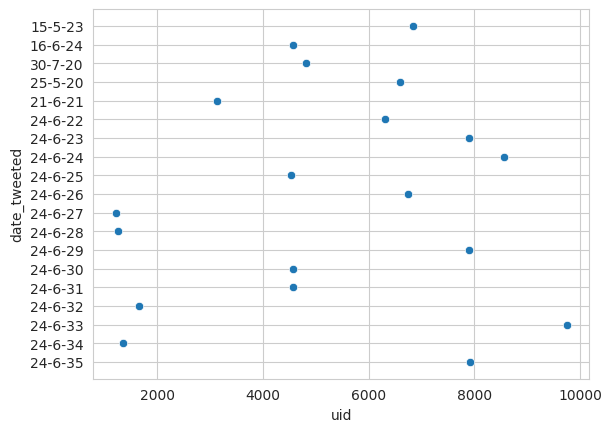

In [ ]:
sns.scatterplot(x = data1['uid'], y = data1['date_tweeted'], palette='pastel')

Data Preprocessing Stage. In this phase, we will be performing the following steps:-

1. Split the data into train and test. This is necessary in order to check how well the model is performing before shipping the model into production. Also any kind of preprocessing needs to be done after splitting the data into train and test set.

In [ ]:
x = data1.drop(['uid'], axis = 1)
y = data1['uid']

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 69)

In [ ]:
train_num = train_x.select_dtypes(include = 'number')
train_cat = train_x.select_dtypes(include = 'object')

test_num = test_x.select_dtypes(include = 'number')
test_cat = test_x.select_dtypes(include = 'object')

In [ ]:
train_num

""
No
15
1
17
13
9
18
7
2
5


**Missing values found before and after**

In [ ]:
print('Missing values before imputation \n', train_cat.isnull().sum())
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat.isnull().sum())

Missing values before imputation 
 user_name       0
date_tweeted    0
text            0
dtype: int64


Missing values after imputation 
 user_name       0
date_tweeted    0
text            0
dtype: int64


**Encoding the categorical features.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(train_cat)
train_cat = pd.DataFrame(encoder.transform(train_cat), columns = encoder.get_feature_names_out())
test_cat = pd.DataFrame(encoder.transform(test_cat), columns = encoder.get_feature_names_out())

In [ ]:
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

In [ ]:
train_cat

,user_name_ADANI_0.0,user_name_ADANI_1.0,user_name_AIR INDIA_0.0,user_name_AIR INDIA_1.0,user_name_AKSHAY KUMMAR_0.0,user_name_AKSHAY KUMMAR_1.0,user_name_AMIR KHAN_0.0,user_name_AMIR KHAN_1.0,user_name_EMIRATES_0.0,user_name_EMIRATES_1.0,...,text_i think what we're building is like the netflix of audio\n\nfounder on clubhouse_0.0,text_i think what we're building is like the netflix of audio\n\nfounder on clubhouse_1.0,text_i’ve run out of reasons to NOT pee my pants_0.0,text_i’ve run out of reasons to NOT pee my pants_1.0,"text_okay, so this video is gonna be about george, and I wanna talk about george, because today is not George Day, it’s George Day, so I’m gonna talk about george today, okay_0.0","text_okay, so this video is gonna be about george, and I wanna talk about george, because today is not George Day, it’s George Day, so I’m gonna talk about george today, okay_1.0",text_omg ive been saying chelsea should sign zidane forever_0.0,text_omg ive been saying chelsea should sign zidane forever_1.0,text_omg just noticed my prozac prescription has expired_0.0,text_omg just noticed my prozac prescription has expired_1.0
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
train_x1 = pd.concat([train_num, train_cat], axis = 1)
test_x1 = pd.concat([test_num, test_cat], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

In [ ]:
scaler = RobustScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

In [ ]:
!pip install xgboost
import xgboost as xgb

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state = 69)
model3 = RandomForestRegressor(random_state = 69)
model4 = KNeighborsRegressor()
model5 = xgb.XGBRegressor()
model6 = SVR()

**Fitting the Linear Regression model.**

In [ ]:
model1.fit(train_x1, train_y)

LinearRegression()

In [ ]:
pred1 = model1.predict(test_x1)
pred1

array([5761.76524041, 5761.76524041, 5761.76524041, 5761.76524041,
       5761.76524041])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae1 = mean_absolute_error(test_y, pred1)

In [ ]:
xx = train_x1.iloc[9]
xx

user_name_ADANI_0.0                                                                                                                                                                   0.0
user_name_ADANI_1.0                                                                                                                                                                   0.0
user_name_AIR INDIA_0.0                                                                                                                                                               0.0
user_name_AIR INDIA_1.0                                                                                                                                                               0.0
user_name_AKSHAY KUMMAR_0.0                                                                                                                                                           0.0
                                                                      

In [ ]:
nan_feat = [cname for cname in data2.columns if data2[cname].isnull().sum() >= 1]

# TO FIND OUT THE % OF NAN
for i in nan_feat:
    print(i, np.round(data2[i].isnull().mean(), 2))

**Feature Selection (Variance Threshold)**

In [ ]:
cat_data = data2.select_dtypes(include = 'object')
pd.crosstab(cat_data['user_name'], columns = 'counts', normalize = True)

col_0,counts
user_name,
ADANI,0.052632
AIR INDIA,0.052632
AKSHAY KUMMAR,0.052632
AMIR KHAN,0.052632
DHIRU,0.052632
EMIRATES,0.052632
Joe Biden,0.052632
Justin Saj,0.052632
LEONO,0.052632


In [ ]:
list1 = []
for i in cat_data.columns:
    list1.append((i, pd.crosstab(cat_data[i], columns = 'counts', normalize = True)))

In [ ]:
list1

[('user_name',
  col_0            counts
  user_name              
  ADANI          0.052632
  AIR INDIA      0.052632
  AKSHAY KUMMAR  0.052632
  AMIR KHAN      0.052632
  DHIRU          0.052632
  EMIRATES       0.052632
  Joe Biden      0.052632
  Justin Saj     0.052632
  LEONO          0.052632
  Narendra Modi  0.052632
  QATAR          0.052632
  RAHUL          0.052632
  RATAN TATA     0.052632
  RONALDO        0.052632
  SAANDEEP       0.052632
  SACHIN         0.052632
  SEHWAG         0.052632
  TENDULKAR      0.052632
  VIJAY          0.052632),
 ('date_tweeted',
  col_0           counts
  date_tweeted          
  15-5-23       0.052632
  16-6-24       0.052632
  21-6-21       0.052632
  24-6-22       0.052632
  24-6-23       0.052632
  24-6-24       0.052632
  24-6-25       0.052632
  24-6-26       0.052632
  24-6-27       0.052632
  24-6-28       0.052632
  24-6-29       0.052632
  24-6-30       0.052632
  24-6-31       0.052632
  24-6-32       0.052632
  24-6-33       0.0

**Feature Selection**

In [ ]:
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,uid
uid,1.000000


In [ ]:
rf_model = RandomForestRegressor(random_state=69)

rf_model.fit(train_x1, train_y)


RandomForestRegressor(random_state=69)

**Starting to split data into training and testing**

In [ ]:
x1 = data2.drop(['uid'], axis = 1)
y1 = data2['uid']

In [ ]:
train_x4, test_x4, train_y4, test_y4 = train_test_split(x1, y1, test_size = 0.2, random_state = 69)

In [ ]:
train_num1 = train_x4.select_dtypes(include = 'number')
train_cat1 = train_x4.select_dtypes(include = 'object')

test_num1 = test_x4.select_dtypes(include = 'number')
test_cat1 = test_x4.select_dtypes(include = 'object')

In [ ]:
print('Missing values before imputation \n', train_num1.isnull().sum())
train_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num1.isnull().sum())

Missing values before imputation 
 Series([], dtype: float64)


Missing values after imputation 
 Series([], dtype: float64)


In [ ]:
train_num1.reset_index(inplace = True, drop = True)
train_cat1.reset_index(inplace = True, drop = True)
test_num1.reset_index(inplace = True, drop = True)
test_cat1.reset_index(inplace = True, drop = True)

In [ ]:
train_x5 = pd.concat([train_num1, train_cat1], axis = 1)
test_x5 = pd.concat([test_num1, test_cat1], axis = 1)

In [ ]:
encoder1 = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder1.fit(train_x5)
train_x5 = pd.DataFrame(encoder1.transform(train_x5), columns = encoder1.get_feature_names_out())
test_x5 = pd.DataFrame(encoder1.transform(test_x5), columns = encoder1.get_feature_names_out())

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(train_x5)
train_x5 = pd.DataFrame(scaler1.transform(train_x5), columns = train_x5.columns)
test_x5 = pd.DataFrame(scaler1.transform(test_x5), columns = test_x5.columns)

In [ ]:
model7 = LinearRegression()
model8 = DecisionTreeRegressor(random_state = 69)
model9 = RandomForestRegressor(random_state = 69)
model10 = KNeighborsRegressor()
model11 = xgb.XGBRegressor()

**Linear Regression**

In [ ]:
model7.fit(train_x5, train_y4)
pred7 = model7.predict(test_x5)

In [ ]:
mae7 = mean_absolute_error(test_y4, pred7)

In [ ]:
mae7

1613.0

In [ ]:
model8.fit(train_x5, train_y4)
pred8 = model8.predict(test_x5)

mae8 = mean_absolute_error(test_y4, pred8)

mae8

1734.5

In [ ]:
model10.fit(train_x5, train_y4)
pred10 = model10.predict(test_x5)

mae10 = mean_absolute_error(test_y4, pred10)

mae10

1613.0

In [ ]:
model11.fit(train_x5, train_y4)
pred11 = model11.predict(test_x5)

mae11 = mean_absolute_error(test_y4, pred11)

mae11

1696.237060546875